# 📊 Lending Club 데이터 탐색적 데이터 분석 (EDA)

## 목표
- 데이터 구조 및 품질 파악
- 변수별 분포 및 상관관계 분석
- 전처리 전략 수립
- 모델링 방향성 도출

## 데이터 흐름
```
원본 데이터 → EDA → 전처리 파이프라인 → 모델링
```

## 1. 환경 설정 및 데이터 로드

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os
from pathlib import Path
from datetime import datetime

# 경고 무시
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (macOS 기준)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 프로젝트 루트 경로 추가
sys.path.append(os.path.join(os.path.dirname('.'), '..'))

RAW_DATA_PATH = "lending_club_2020_train.csv"
PROCESSED_DATA_PATH = "preprocessed_data_final.csv"

print(f"📁 데이터 경로: {RAW_DATA_PATH}")
# print(f"📁 결과 저장 경로: {REPORTS_DIR}")

📁 데이터 경로: lending_club_2020_train.csv


## 2. 데이터 로드 및 기본 정보

In [4]:
# 데이터 로드 (메모리 효율성을 위해 샘플링)
print("🔄 데이터 로딩 중...")

# 전체 데이터 크기 확인
df_full = pd.read_csv(RAW_DATA_PATH, low_memory=False, nrows=1000)
print(f"✅ 샘플 데이터 로드 완료: {df_full.shape}")

# 실제 데이터 크기 확인
total_rows = sum(1 for line in open(RAW_DATA_PATH)) - 1
print(f"📊 전체 데이터 크기: {total_rows:,}행")

# 메모리 효율을 위한 샘플링 (10% 또는 최대 100,000행)
sample_size = min(100000, int(total_rows * 0.1))
print(f"📋 분석용 샘플 크기: {sample_size:,}행")

# 샘플링된 데이터 로드
df = pd.read_csv(RAW_DATA_PATH, low_memory=False, nrows=sample_size)
print(f"✅ 샘플링된 데이터 로드 완료: {df.shape}")

# 기본 정보
print("\n📊 데이터 기본 정보:")
print(f"- 행 수: {df.shape[0]:,}개")
print(f"- 열 수: {df.shape[1]}개")
print(f"- 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 데이터 타입별 분포
print("\n📋 데이터 타입 분포:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"- {dtype}: {count}개")

🔄 데이터 로딩 중...
✅ 샘플 데이터 로드 완료: (1000, 141)
📊 전체 데이터 크기: 1,755,295행
📋 분석용 샘플 크기: 100,000행
✅ 샘플링된 데이터 로드 완료: (100000, 141)

📊 데이터 기본 정보:
- 행 수: 100,000개
- 열 수: 141개
- 메모리 사용량: 247.44 MB

📋 데이터 타입 분포:
- float64: 106개
- object: 34개
- int64: 1개


## 3. 데이터 타입 전처리

In [8]:
# 퍼센트 컬럼 전처리
print("🔧 데이터 타입 전처리:")

# 퍼센트 컬럼 처리
percentage_columns = ['int_rate', 'revol_util']
for col in percentage_columns:
    if col in df.columns:
        try:
            # 퍼센트 기호 제거 및 float 변환
            df[col] = df[col].astype(str).str.replace('%', '').astype(float)
            print(f"✅ {col}: 퍼센트 기호 제거 완료")
        except Exception as e:
            print(f"⚠️ {col}: 변환 실패 - {e}")

# FICO 점수 컬럼 처리
fico_columns = ['fico_range_low', 'fico_range_high']
for col in fico_columns:
    if col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"✅ {col}: 숫자형 변환 완료")
        except Exception as e:
            print(f"⚠️ {col}: 변환 실패 - {e}")

# 수치형 변수 재확인
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 수치형 변수: {len(numeric_cols)}개")
print(f"수치형 변수 목록: {numeric_cols[:10]}...")  # 처음 10개만 표시

🔧 데이터 타입 전처리:
✅ int_rate: 퍼센트 기호 제거 완료
✅ revol_util: 퍼센트 기호 제거 완료
✅ fico_range_low: 숫자형 변환 완료
✅ fico_range_high: 숫자형 변환 완료

📊 수치형 변수: 109개
수치형 변수 목록: ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low']...


## 4. 결측치 분석

🔍 결측치 분석:

📋 결측치가 있는 변수: 103개
                                                                                   변수명  \
hardship_loan_status                                              hardship_loan_status   
hardship_reason                                                        hardship_reason   
hardship_length                                                        hardship_length   
hardship_status                                                        hardship_status   
deferral_term                                                            deferral_term   
hardship_start_date                                                hardship_start_date   
hardship_type                                                            hardship_type   
hardship_end_date                                                    hardship_end_date   
hardship_dpd                                                              hardship_dpd   
payment_plan_start_date                                        payment

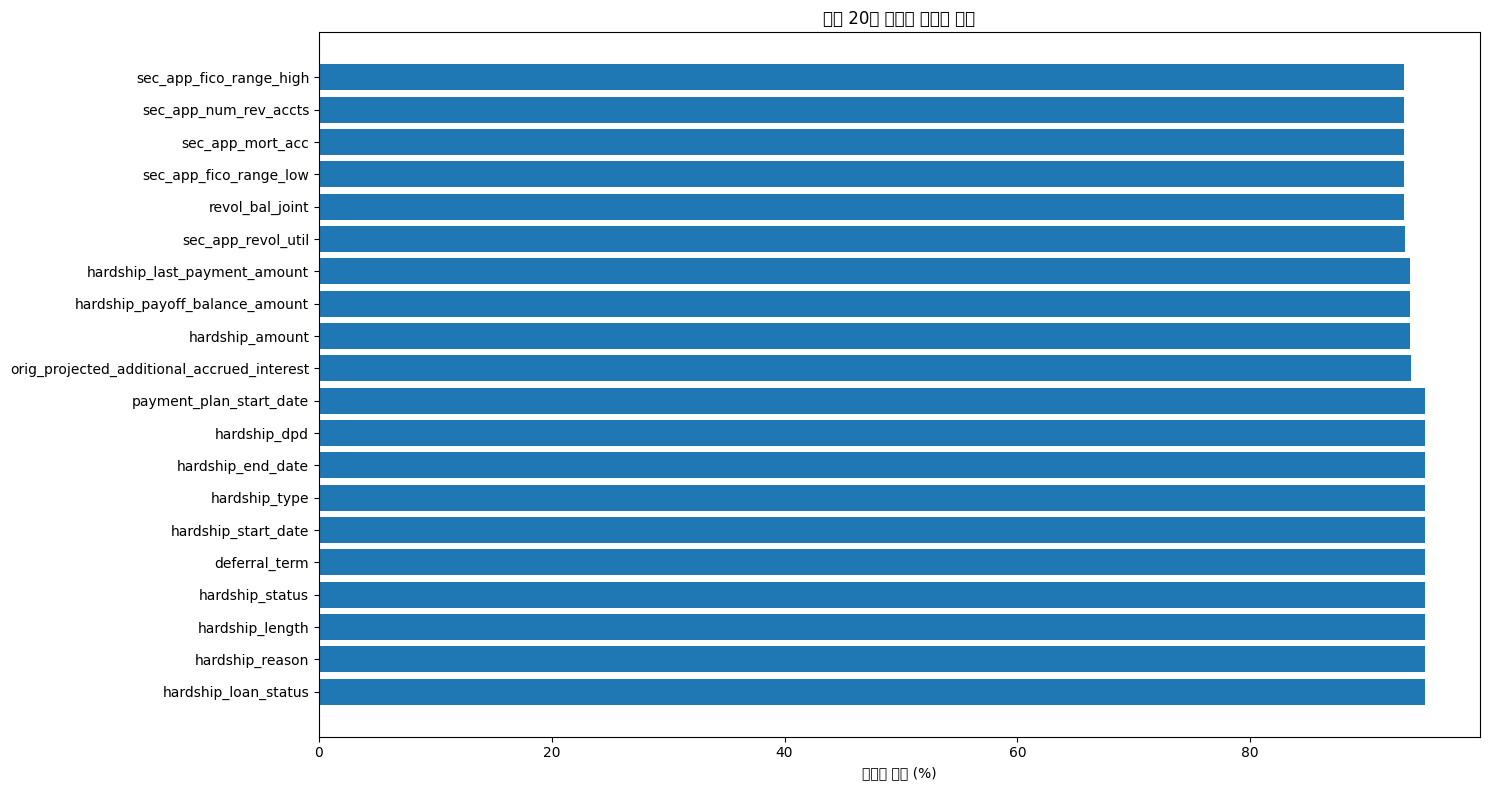


📊 결측치 패턴:
- 결측치가 없는 변수: 38개
- 결측치가 있는 변수: 103개
- 50% 이상 결측치: 35개
- 80% 이상 결측치: 30개


In [9]:
# 결측치 분석
print("🔍 결측치 분석:")

# 결측치 비율 계산
missing_ratios = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    '변수명': missing_ratios.index,
    '결측치 수': df.isnull().sum(),
    '결측치 비율(%)': missing_ratios.values
}).sort_values('결측치 비율(%)', ascending=False)

# 결측치가 있는 변수만 필터링
missing_vars = missing_df[missing_df['결측치 비율(%)'] > 0]
print(f"\n📋 결측치가 있는 변수: {len(missing_vars)}개")
print(missing_vars.head(20))

# 결측치 시각화 (상위 20개만)
if len(missing_vars) > 0:
    plt.figure(figsize=(15, 8))
    top_missing = missing_vars.head(20)
    plt.barh(range(len(top_missing)), top_missing['결측치 비율(%)'])
    plt.yticks(range(len(top_missing)), top_missing['변수명'])
    plt.xlabel('결측치 비율 (%)')
    plt.title('상위 20개 변수의 결측치 비율')
    plt.tight_layout()
    plt.show()

# 결측치 패턴 분석
print(f"\n📊 결측치 패턴:")
print(f"- 결측치가 없는 변수: {len(missing_df[missing_df['결측치 비율(%)'] == 0])}개")
print(f"- 결측치가 있는 변수: {len(missing_vars)}개")
print(f"- 50% 이상 결측치: {len(missing_vars[missing_vars['결측치 비율(%)'] >= 50])}개")
print(f"- 80% 이상 결측치: {len(missing_vars[missing_vars['결측치 비율(%)'] >= 80])}개")

## 5. 타겟 변수 분석

🎯 타겟 변수 분석:

📊 loan_status 분포:
- Fully Paid: 51,224개 (51.22%)
- Current: 35,194개 (35.19%)
- Charged Off: 12,385개 (12.38%)
- Late (31-120 days): 544개 (0.54%)
- In Grace Period: 336개 (0.34%)
- Late (16-30 days): 105개 (0.10%)
- Issued: 81개 (0.08%)
- Does not meet the credit policy. Status:Fully Paid: 77개 (0.08%)
- Does not meet the credit policy. Status:Charged Off: 41개 (0.04%)
- Default: 13개 (0.01%)

🎯 이진 타겟 변수 분포:
- 정상 (0): 86,831개 (86.83%)
- 부도 (1): 13,088개 (13.09%)


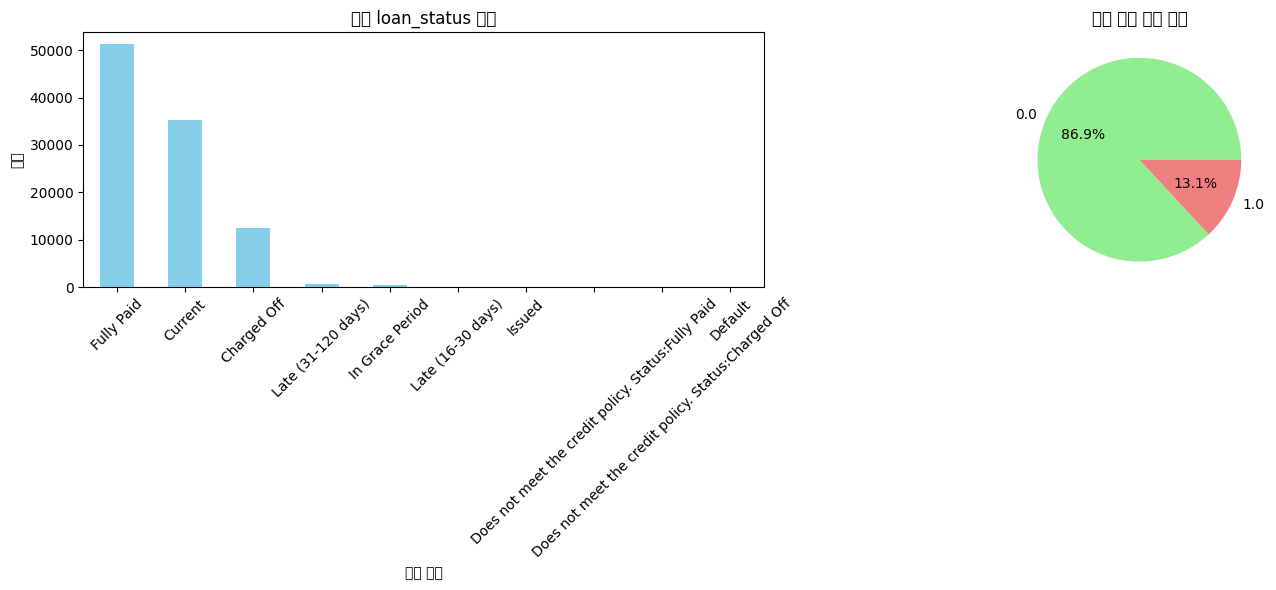

In [10]:
# 타겟 변수 (loan_status) 분석
print("🎯 타겟 변수 분석:")

# loan_status 분포
if 'loan_status' in df.columns:
    loan_status_counts = df['loan_status'].value_counts()
    print("\n📊 loan_status 분포:")
    for status, count in loan_status_counts.items():
        percentage = (count / len(df)) * 100
        print(f"- {status}: {count:,}개 ({percentage:.2f}%)")

    # 타겟 변수 생성 (전처리 파이프라인과 동일한 로직)
    loan_status_mapping = {
        'Fully Paid': 0, 'Current': 0, 'In Grace Period': 0,
        'Late (16-30 days)': 1, 
        'Late (31-120 days)': 1,
        'Charged Off': 1, 
        'Default': 1,
        'Does not meet the credit policy. Status:Fully Paid': 0,
        'Does not meet the credit policy. Status:Charged Off': 1,
    }

    df['target'] = df['loan_status'].map(loan_status_mapping)
    target_dist = df['target'].value_counts()

    print(f"\n🎯 이진 타겟 변수 분포:")
    print(f"- 정상 (0): {target_dist[0]:,}개 ({(target_dist[0]/len(df)*100):.2f}%)")
    print(f"- 부도 (1): {target_dist[1]:,}개 ({(target_dist[1]/len(df)*100):.2f}%)")

    # 타겟 변수 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 원본 loan_status
    loan_status_counts.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('원본 loan_status 분포')
    ax1.set_xlabel('대출 상태')
    ax1.set_ylabel('개수')
    ax1.tick_params(axis='x', rotation=45)

    # 이진 타겟 변수
    target_dist.plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    ax2.set_title('이진 타겟 변수 분포')
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ loan_status 컬럼이 없습니다.")

## 6. 수치형 변수 분석 (수정된 버전)

📈 수치형 변수 분석:

📊 수치형 변수: 110개
수치형 변수 목록: ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low']...

📋 분석 가능한 주요 수치형 변수: 7개
변수 목록: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'fico_range_low', 'fico_range_high']

📋 주요 수치형 변수 통계:
           loan_amnt       int_rate    annual_inc           dti    revol_util  \
count  100000.000000  100000.000000  1.000000e+05  99891.000000  99901.000000   
mean    15375.593000      13.039139  7.971237e+04     19.357017     48.959210   
std      9472.018131       4.854096  7.516986e+04     15.956952     24.862653   
min       900.000000       5.310000  0.000000e+00      0.000000      0.000000   
25%      8000.000000       9.170000  4.700000e+04     12.120000     29.800000   
50%     13000.000000      12.490000  6.600000e+04     18.140000     48.500000   
75%     20000.000000      15.990000  9.500000e+04     24.880000     68.000000   
max     40000.000000      30

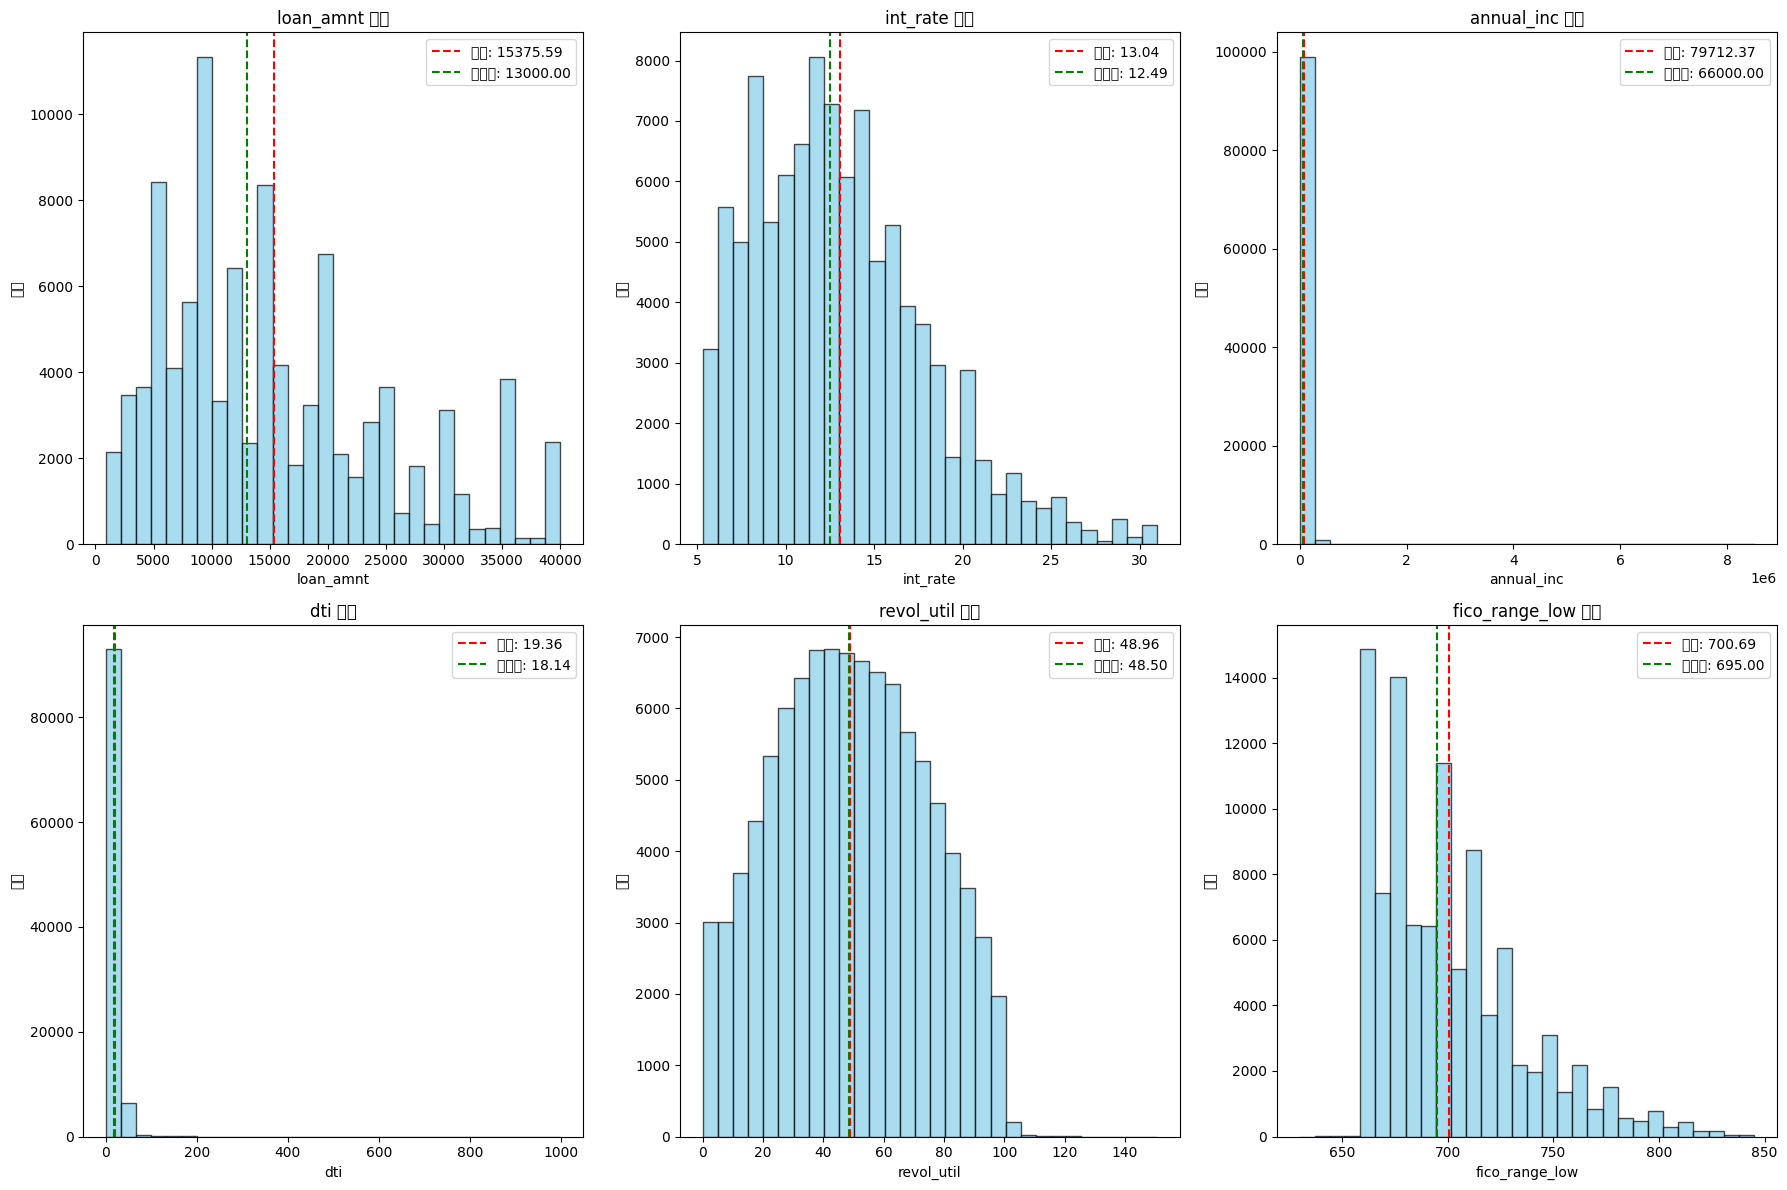


🔗 상관관계 분석 (결측치 적은 변수 7개):
                 loan_amnt  int_rate  annual_inc       dti  revol_util  \
loan_amnt         1.000000  0.060321    0.294213  0.051071    0.100984   
int_rate          0.060321  1.000000   -0.075041  0.114421    0.267028   
annual_inc        0.294213 -0.075041    1.000000 -0.126770    0.046156   
dti               0.051071  0.114421   -0.126770  1.000000    0.099596   
revol_util        0.100984  0.267028    0.046156  0.099596    1.000000   
fico_range_low    0.110914 -0.409383    0.048670 -0.011557   -0.495431   
fico_range_high   0.110911 -0.409379    0.048669 -0.011557   -0.495429   

                 fico_range_low  fico_range_high  
loan_amnt              0.110914         0.110911  
int_rate              -0.409383        -0.409379  
annual_inc             0.048670         0.048669  
dti                   -0.011557        -0.011557  
revol_util            -0.495431        -0.495429  
fico_range_low         1.000000         1.000000  
fico_range_high        

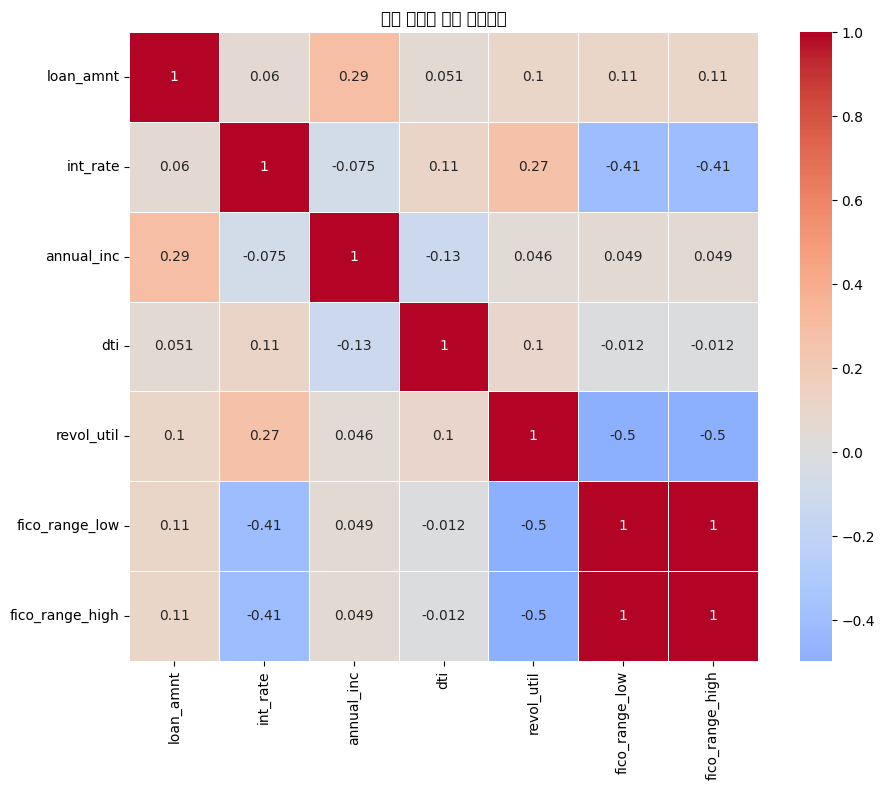

In [11]:
# 수치형 변수 분석
print("📈 수치형 변수 분석:")

# 수치형 변수 선택 (안전한 방법)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 수치형 변수: {len(numeric_cols)}개")
print(f"수치형 변수 목록: {numeric_cols[:10]}...")  # 처음 10개만 표시

# 주요 수치형 변수 (안전한 버전)
key_numeric_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'fico_range_low', 'fico_range_high']
available_key_vars = [var for var in key_numeric_vars if var in df.columns]

print(f"\n📋 분석 가능한 주요 수치형 변수: {len(available_key_vars)}개")
print(f"변수 목록: {available_key_vars}")

# 안전한 통계 계산
if len(available_key_vars) > 0:
    try:
        stats_df = df[available_key_vars].describe()
        print(f"\n📋 주요 수치형 변수 통계:")
        print(stats_df)
    except Exception as e:
        print(f"⚠️ 통계 계산 실패: {e}")

    # 안전한 시각화
    try:
        # 시각화할 변수 수 제한
        plot_vars = available_key_vars[:6]  # 최대 6개만
        n_plots = len(plot_vars)
        
        if n_plots > 0:
            # 서브플롯 크기 계산
            cols = 3
            rows = (n_plots + cols - 1) // cols
            
            fig, axes = plt.subplots(rows, cols, figsize=(18, 6*rows))
            if rows == 1:
                axes = axes.reshape(1, -1)
            elif cols == 1:
                axes = axes.reshape(-1, 1)
            
            for i, var in enumerate(plot_vars):
                row = i // cols
                col = i % cols
                
                if var in df.columns:
                    # 결측치 제거 후 히스토그램
                    clean_data = df[var].dropna()
                    if len(clean_data) > 0:
                        axes[row, col].hist(clean_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                        axes[row, col].set_title(f'{var} 분포')
                        axes[row, col].set_xlabel(var)
                        axes[row, col].set_ylabel('빈도')
                        
                        # 통계 정보 추가
                        mean_val = clean_data.mean()
                        median_val = clean_data.median()
                        axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'평균: {mean_val:.2f}')
                        axes[row, col].axvline(median_val, color='green', linestyle='--', label=f'중앙값: {median_val:.2f}')
                        axes[row, col].legend()
                    else:
                        axes[row, col].text(0.5, 0.5, f'{var}\n(데이터 없음)', ha='center', va='center', transform=axes[row, col].transAxes)
                        axes[row, col].set_title(f'{var} 분포')
                
                # 빈 서브플롯 숨기기
                if i >= n_plots:
                    axes[row, col].set_visible(False)
            
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"⚠️ 시각화 실패: {e}")

    # 안전한 상관관계 분석
    try:
        if len(available_key_vars) > 1:
            # 결측치가 적은 변수만 선택
            clean_vars = []
            for var in available_key_vars:
                if df[var].isnull().sum() / len(df) < 0.5:  # 50% 미만 결측치
                    clean_vars.append(var)
            
            if len(clean_vars) > 1:
                correlation_matrix = df[clean_vars].corr()
                print(f"\n🔗 상관관계 분석 (결측치 적은 변수 {len(clean_vars)}개):")
                print(correlation_matrix)

                # 상관관계 히트맵
                plt.figure(figsize=(10, 8))
                sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                            square=True, linewidths=0.5)
                plt.title('주요 수치형 변수 상관관계')
                plt.tight_layout()
                plt.show()
            else:
                print("⚠️ 상관관계 분석을 위한 충분한 변수가 없습니다.")
        
    except Exception as e:
        print(f"⚠️ 상관관계 분석 실패: {e}")
else:
    print("⚠️ 분석할 수치형 변수가 없습니다.")

## 7. 범주형 변수 분석

📊 범주형 변수 분석:

📋 범주형 변수: 32개

📊 주요 범주형 변수 분석:

grade:
  - 고유값 수: 7개
  - 결측치: 0개
  - 상위 5개 값:
    B: 29,435개 (29.43%)
    C: 27,396개 (27.40%)
    A: 22,401개 (22.40%)
    D: 14,153개 (14.15%)
    E: 4,762개 (4.76%)

sub_grade:
  - 고유값 수: 35개
  - 결측치: 0개
  - 상위 5개 값:
    B4: 6,417개 (6.42%)
    C1: 6,073개 (6.07%)
    B5: 6,067개 (6.07%)
    B1: 5,702개 (5.70%)
    B3: 5,659개 (5.66%)

emp_length:
  - 고유값 수: 11개
  - 결측치: 7133개
  - 상위 5개 값:
    10+ years: 32,236개 (32.24%)
    < 1 year: 9,211개 (9.21%)
    2 years: 8,992개 (8.99%)
    3 years: 8,038개 (8.04%)
    1 year: 6,788개 (6.79%)

home_ownership:
  - 고유값 수: 6개
  - 결측치: 0개
  - 상위 5개 값:
    MORTGAGE: 49,233개 (49.23%)
    RENT: 39,663개 (39.66%)
    OWN: 10,989개 (10.99%)
    ANY: 108개 (0.11%)
    OTHER: 4개 (0.00%)

verification_status:
  - 고유값 수: 3개
  - 결측치: 0개
  - 상위 5개 값:
    Source Verified: 39,055개 (39.05%)
    Not Verified: 36,371개 (36.37%)
    Verified: 24,574개 (24.57%)

purpose:
  - 고유값 수: 14개
  - 결측치: 0개
  - 상위 5개 값:
    debt_consolidation: 

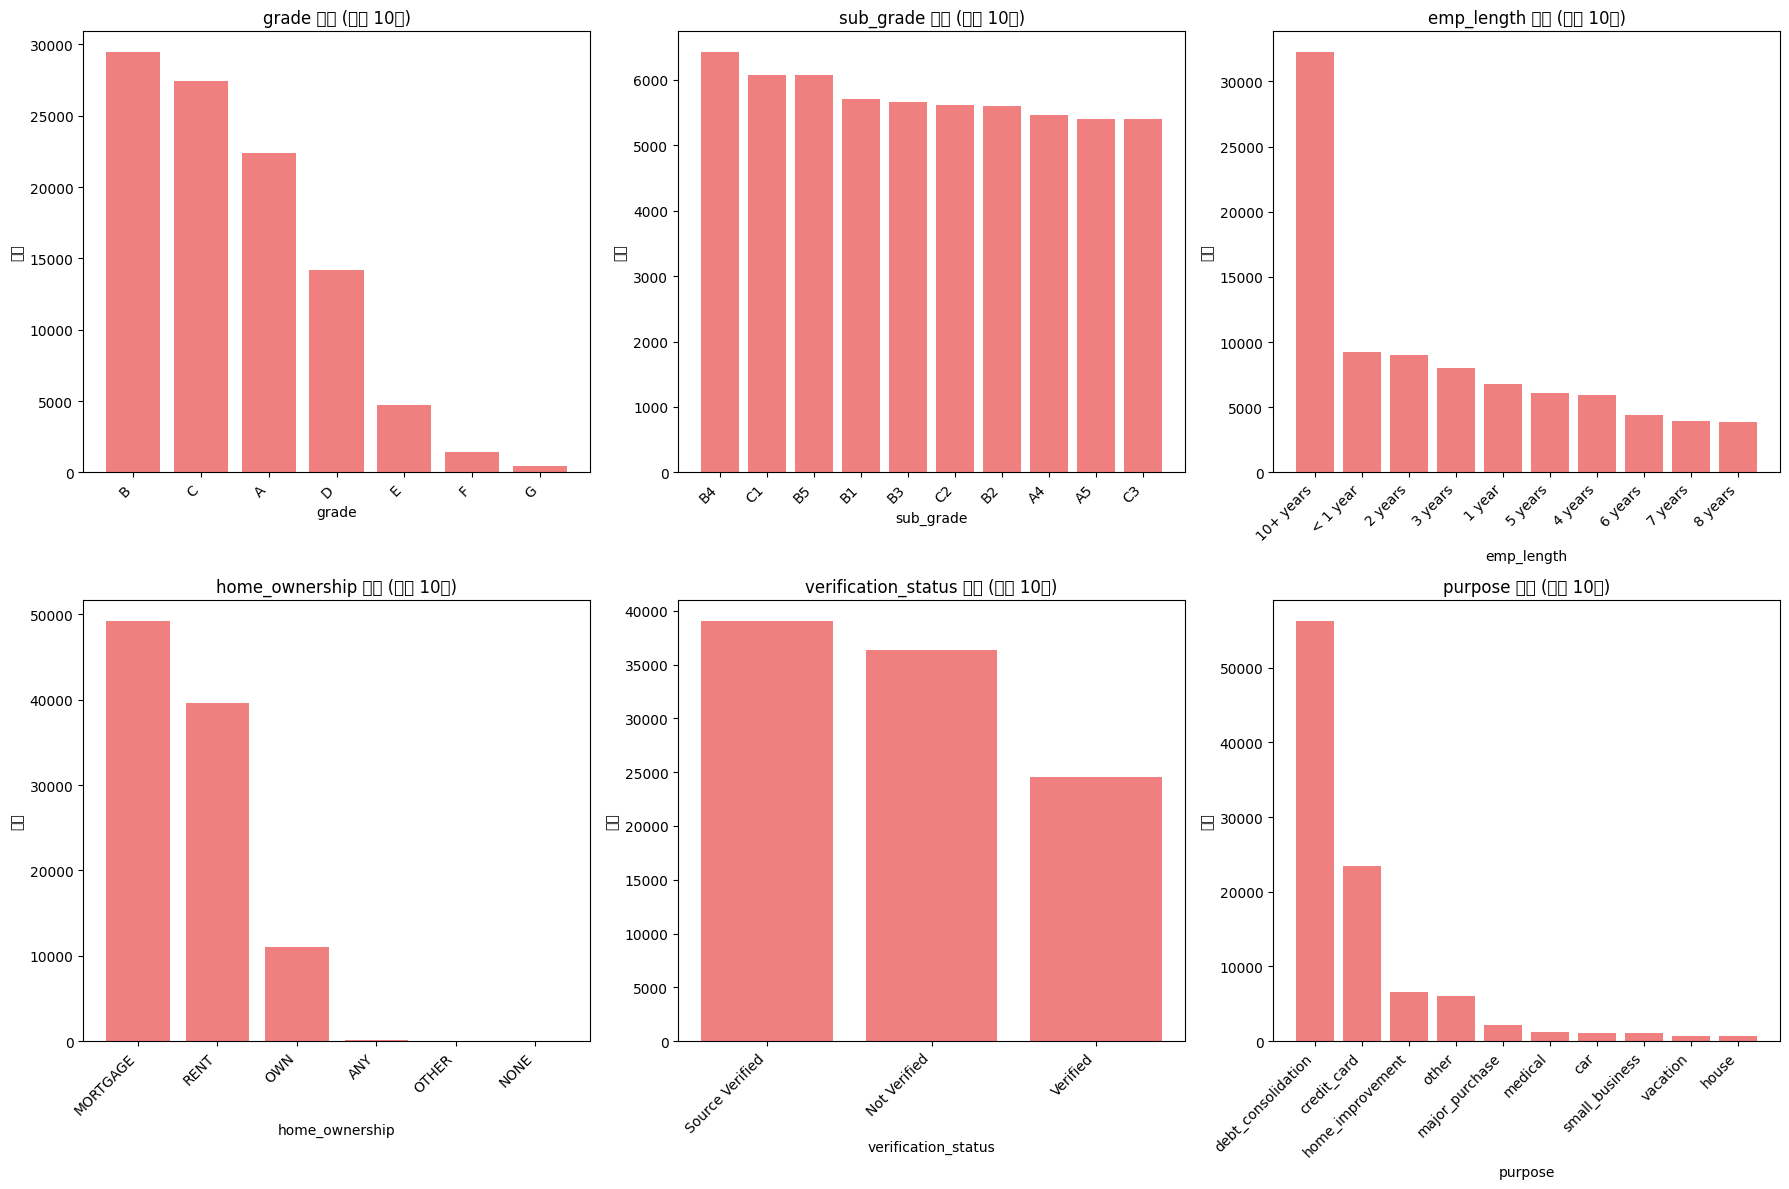


🎯 범주형 변수별 타겟 변수 분포:

grade별 부도율:
       count      mean
grade                 
G        411  0.450122
F       1411  0.408221
E       4741  0.326302
D      14122  0.214346
C      27359  0.151504
B      29400  0.092279
A      22357  0.038198

sub_grade별 부도율:
           count      mean
sub_grade                 
G5            54  0.518519
G3            60  0.483333
G2            96  0.468750
F5           196  0.454082
F3           276  0.431159
G4            60  0.416667
G1           141  0.411348
F2           303  0.399340
F4           200  0.390000
F1           436  0.387615

emp_length별 부도율:
            count      mean
emp_length                 
9 years      3244  0.143342
7 years      3971  0.139763
8 years      3864  0.139234
1 year       6766  0.137748
5 years      6126  0.134835
3 years      8019  0.133308
4 years      5955  0.131822
2 years      8972  0.129848
6 years      4391  0.128672
< 1 year     9180  0.125599


In [8]:
# 범주형 변수 분석
print("📊 범주형 변수 분석:")

# 범주형 변수 선택
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n📋 범주형 변수: {len(categorical_cols)}개")

# 주요 범주형 변수
key_categorical_vars = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state']
available_cat_vars = [var for var in key_categorical_vars if var in df.columns]

print(f"\n📊 주요 범주형 변수 분석:")
for var in available_cat_vars:
    unique_count = df[var].nunique()
    missing_count = df[var].isnull().sum()
    print(f"\n{var}:")
    print(f"  - 고유값 수: {unique_count}개")
    print(f"  - 결측치: {missing_count}개")
    print(f"  - 상위 5개 값:")
    value_counts = df[var].value_counts().head()
    for val, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"    {val}: {count:,}개 ({percentage:.2f}%)")

# 안전한 범주형 변수 시각화
try:
    plot_cat_vars = available_cat_vars[:6]  # 최대 6개만
    if len(plot_cat_vars) > 0:
        cols = 3
        rows = (len(plot_cat_vars) + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(18, 6*rows))
        if rows == 1:
            axes = axes.reshape(1, -1)
        elif cols == 1:
            axes = axes.reshape(-1, 1)
        
        for i, var in enumerate(plot_cat_vars):
            row = i // cols
            col = i % cols
            
            if var in df.columns:
                # 상위 10개 값만 표시
                top_values = df[var].value_counts().head(10)
                if len(top_values) > 0:
                    axes[row, col].bar(range(len(top_values)), top_values.values, color='lightcoral')
                    axes[row, col].set_title(f'{var} 분포 (상위 10개)')
                    axes[row, col].set_xlabel(var)
                    axes[row, col].set_ylabel('개수')
                    axes[row, col].tick_params(axis='x', rotation=45)
                    
                    # x축 라벨 설정
                    axes[row, col].set_xticks(range(len(top_values)))
                    axes[row, col].set_xticklabels(top_values.index, rotation=45, ha='right')
                else:
                    axes[row, col].text(0.5, 0.5, f'{var}\n(데이터 없음)', ha='center', va='center', transform=axes[row, col].transAxes)
                    axes[row, col].set_title(f'{var} 분포')
            
            # 빈 서브플롯 숨기기
            if i >= len(plot_cat_vars):
                axes[row, col].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    # 타겟 변수와의 관계 분석
    if 'target' in df.columns:
        print("\n🎯 범주형 변수별 타겟 변수 분포:")
        for var in available_cat_vars[:3]:  # 상위 3개만 분석
            print(f"\n{var}별 부도율:")
            target_by_cat = df.groupby(var)['target'].agg(['count', 'mean']).sort_values('mean', ascending=False)
            print(target_by_cat.head(10))
            
except Exception as e:
    print(f"⚠️ 범주형 변수 시각화 실패: {e}")

## 8. 이상치 분석

🔍 이상치 분석:

📊 이상치 분석 결과:

loan_amnt:
  - Q1: 8000.00
  - Q3: 20000.00
  - IQR: 12000.00
  - 하한: -10000.00
  - 상한: 38000.00
  - 이상치 수: 2,432개 (2.43%)

annual_inc:
  - Q1: 47000.00
  - Q3: 95000.00
  - IQR: 48000.00
  - 하한: -25000.00
  - 상한: 167000.00
  - 이상치 수: 4,955개 (4.96%)

dti:
  - Q1: 12.12
  - Q3: 24.88
  - IQR: 12.76
  - 하한: -7.02
  - 상한: 44.02
  - 이상치 수: 1,317개 (1.32%)

revol_util:
  - Q1: 29.80
  - Q3: 68.00
  - IQR: 38.20
  - 하한: -27.50
  - 상한: 125.30
  - 이상치 수: 3개 (0.00%)

fico_range_low:
  - Q1: 675.00
  - Q3: 720.00
  - IQR: 45.00
  - 하한: 607.50
  - 상한: 787.50
  - 이상치 수: 2,434개 (2.43%)


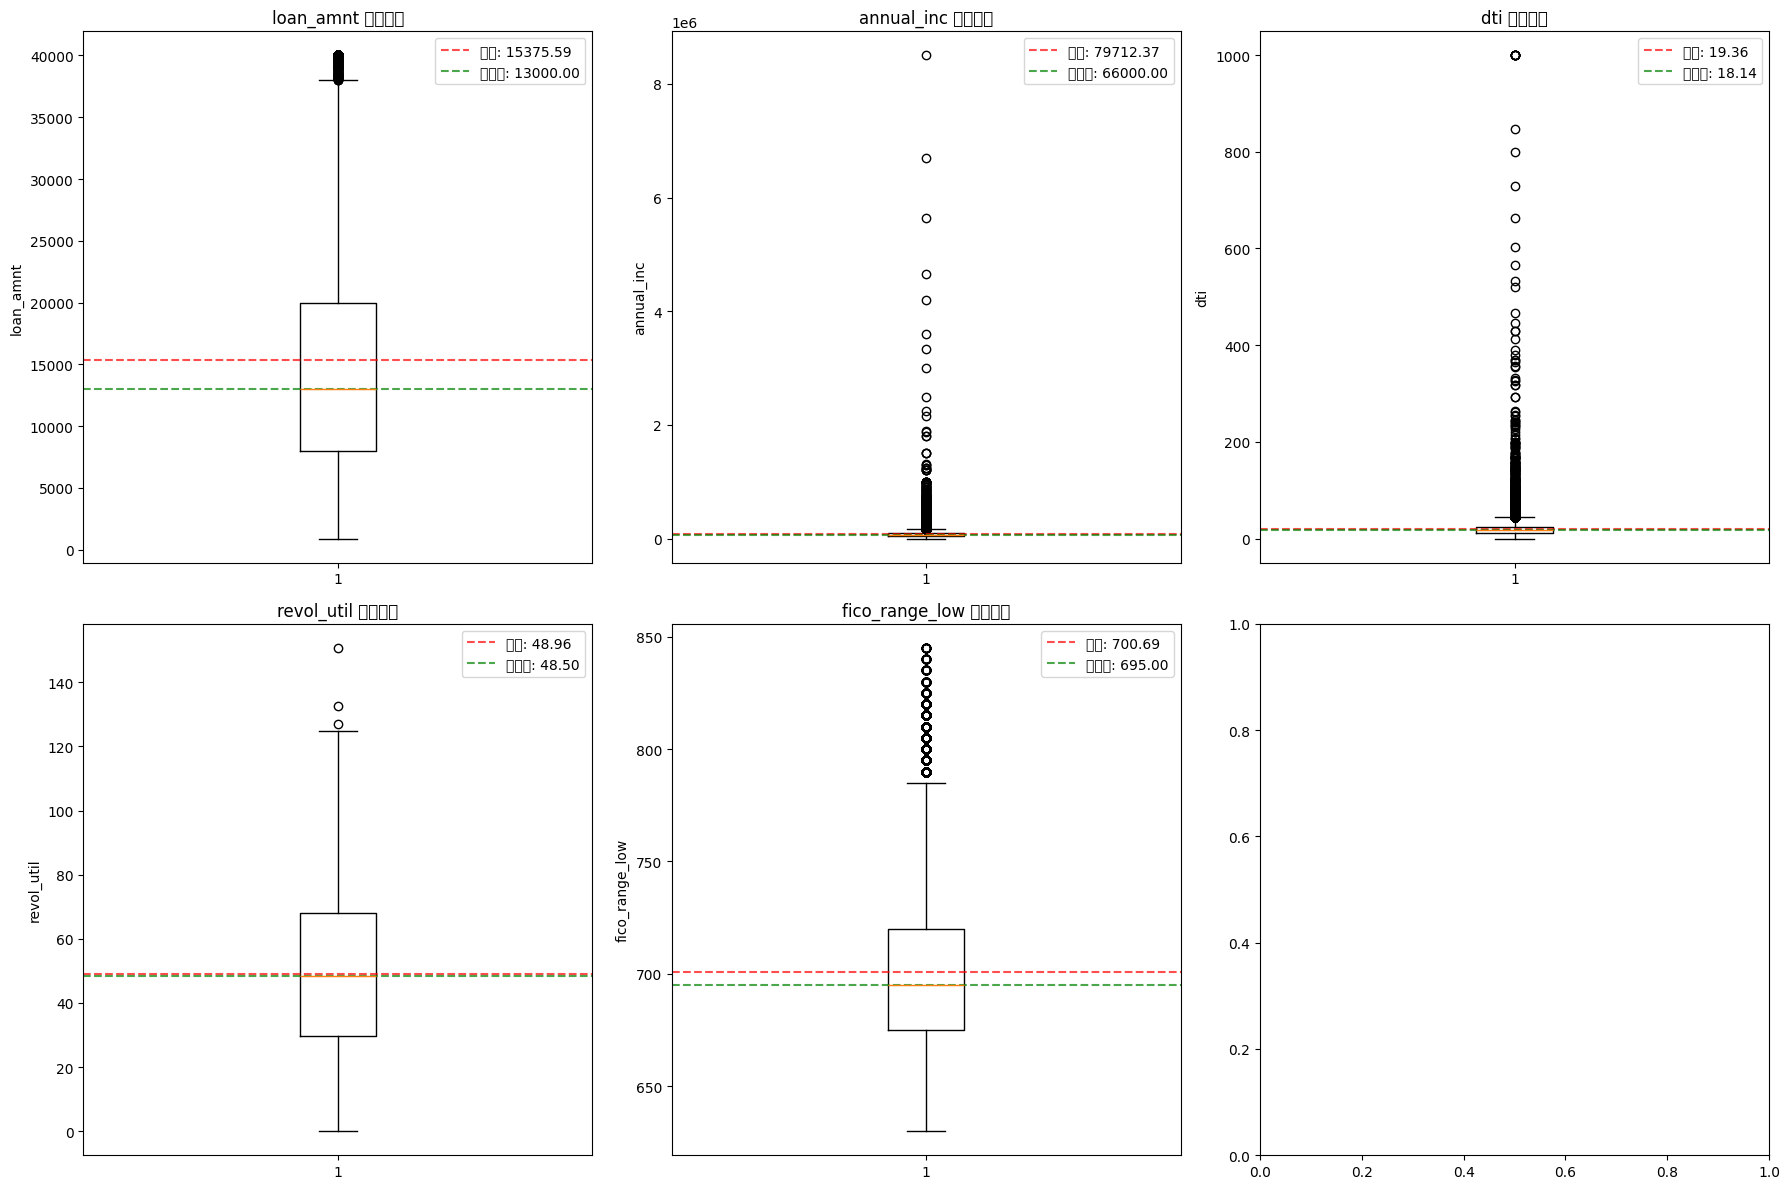

In [11]:
# 이상치 분석
print("🔍 이상치 분석:")

# 주요 수치형 변수의 이상치 탐지
outlier_vars = ['loan_amnt', 'annual_inc', 'dti', 'revol_util', 'fico_range_low']
available_outlier_vars = [var for var in outlier_vars if var in df.columns]

print(f"\n📊 이상치 분석 결과:")
for var in available_outlier_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    print(f"\n{var}:")
    print(f"  - Q1: {Q1:.2f}")
    print(f"  - Q3: {Q3:.2f}")
    print(f"  - IQR: {IQR:.2f}")
    print(f"  - 하한: {lower_bound:.2f}")
    print(f"  - 상한: {upper_bound:.2f}")
    print(f"  - 이상치 수: {outlier_count:,}개 ({outlier_percentage:.2f}%)")

# 박스플롯으로 이상치 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(available_outlier_vars[:6]):
    if i < len(axes):
        axes[i].boxplot(df[var].dropna())
        axes[i].set_title(f'{var} 박스플롯')
        axes[i].set_ylabel(var)
        
        # 통계 정보 추가
        mean_val = df[var].mean()
        median_val = df[var].median()
        axes[i].axhline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'평균: {mean_val:.2f}')
        axes[i].axhline(median_val, color='green', linestyle='--', alpha=0.7, label=f'중앙값: {median_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

## 9. 데이터 품질 요약 및 권장사항

In [10]:
# 데이터 품질 요약
print("📋 데이터 품질 요약:")
print("=" * 50)

# 1. 데이터 크기
print(f"\n📊 데이터 크기:")
print(f"  - 샘플 행 수: {df.shape[0]:,}개")
print(f"  - 전체 행 수: {total_rows:,}개")
print(f"  - 열 수: {df.shape[1]}개")
print(f"  - 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 2. 결측치 현황
missing_ratios = (df.isnull().sum() / len(df)) * 100
high_missing_vars = missing_ratios[missing_ratios > 50].index.tolist()
print(f"\n🔍 결측치 현황:")
print(f"  - 결측치가 있는 변수: {len(missing_ratios[missing_ratios > 0])}개")
print(f"  - 50% 이상 결측치: {len(high_missing_vars)}개")
if high_missing_vars:
    print(f"  - 고결측치 변수: {high_missing_vars[:5]}...")  # 처음 5개만

# 3. 타겟 변수 분포
if 'target' in df.columns:
    target_dist = df['target'].value_counts()
    print(f"\n🎯 타겟 변수 분포:")
    print(f"  - 정상 (0): {target_dist[0]:,}개 ({(target_dist[0]/len(df)*100):.2f}%)")
    print(f"  - 부도 (1): {target_dist[1]:,}개 ({(target_dist[1]/len(df)*100):.2f}%)")

# 4. 변수 타입 분포
dtype_counts = df.dtypes.value_counts()
print(f"\n📋 변수 타입 분포:")
for dtype, count in dtype_counts.items():
    print(f"  - {dtype}: {count}개")

# 5. 권장사항
print(f"\n💡 전처리 권장사항:")
print(f"  1. 결측치 처리:")
print(f"     - 50% 이상 결측치 변수 제거 또는 특별 처리")
print(f"     - 범주형: 최빈값, 수치형: 중앙값으로 대체")
print(f"  2. 이상치 처리:")
print(f"     - IQR 기반 이상치 탐지 및 처리")
print(f"     - 극단값 클리핑 또는 변환")
print(f"  3. 특성 엔지니어링:")
print(f"     - FICO 평균, 소득 대비 부채 비율 등 복합 특성 생성")
print(f"     - 시간 기반 특성 (연도, 월, 계절성)")
print(f"  4. 범주형 인코딩:")
print(f"     - One-Hot Encoding (카테고리 적은 변수)")
print(f"     - Label Encoding (순서형 변수)")
print(f"     - Target Encoding (고차원 범주형)")
print(f"  5. 스케일링:")
print(f"     - 수치형 변수 표준화/정규화")
print(f"     - 타겟 변수는 스케일링 제외")
print(f"  6. 불균형 처리:")
print(f"     - SMOTE 오버샘플링")
print(f"     - 클래스 가중치 조정")

# 6. 모델링 전략
print(f"\n🎯 모델링 전략:")
print(f"  1. 평가 지표: ROC-AUC, Precision-Recall, F1-Score")
print(f"  2. 교차검증: Stratified K-Fold (불균형 데이터)")
print(f"  3. 모델 선택: Random Forest, XGBoost, LightGBM")
print(f"  4. 하이퍼파라미터 튜닝: GridSearchCV 또는 RandomizedSearchCV")

print("\n✅ EDA 완료! 전처리 파이프라인으로 진행하세요.")

📋 데이터 품질 요약:

📊 데이터 크기:
  - 샘플 행 수: 100,000개
  - 전체 행 수: 1,755,295개
  - 열 수: 142개
  - 메모리 사용량: 239.27 MB

🔍 결측치 현황:
  - 결측치가 있는 변수: 104개
  - 50% 이상 결측치: 35개
  - 고결측치 변수: ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint']...

🎯 타겟 변수 분포:
  - 정상 (0): 86,754개 (86.75%)
  - 부도 (1): 13,047개 (13.05%)

📋 변수 타입 분포:
  - float64: 109개
  - object: 32개
  - int64: 1개

💡 전처리 권장사항:
  1. 결측치 처리:
     - 50% 이상 결측치 변수 제거 또는 특별 처리
     - 범주형: 최빈값, 수치형: 중앙값으로 대체
  2. 이상치 처리:
     - IQR 기반 이상치 탐지 및 처리
     - 극단값 클리핑 또는 변환
  3. 특성 엔지니어링:
     - FICO 평균, 소득 대비 부채 비율 등 복합 특성 생성
     - 시간 기반 특성 (연도, 월, 계절성)
  4. 범주형 인코딩:
     - One-Hot Encoding (카테고리 적은 변수)
     - Label Encoding (순서형 변수)
     - Target Encoding (고차원 범주형)
  5. 스케일링:
     - 수치형 변수 표준화/정규화
     - 타겟 변수는 스케일링 제외
  6. 불균형 처리:
     - SMOTE 오버샘플링
     - 클래스 가중치 조정

🎯 모델링 전략:
  1. 평가 지표: ROC-AUC, Precision-Recall, F1-Score
  2. 교차검증: Stratified K-Fold (불균형 데이터)
  3. 모델 선택: Random Fores

# 전처리 과정